# HR Attrition Analysis

## Business Problem

Employee attrition increases hiring costs, disrupts team productivity, and impacts business continuity.
The objective of this analysis is to identify the key drivers of employee turnover and highlight
high-risk employee segments to support data-driven retention strategies.

## Key Business Questions

1. What is the overall employee attrition rate?
2. Which departments and job roles have the highest attrition?
3. How does attrition vary by age group and tenure?
4. How does compensation and overtime impact attrition?
5. Which employee segments should be prioritized for retention?

---


## 1. Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Absolute paths (professional & reliable)
DATA_PATH = r"C:\Users\hp\Desktop\Project_3_HR_Attrition_Analysis\Data\hr_attrition_cleaned.csv"
IMAGE_DIR = r"C:\Users\hp\Desktop\Project_3_HR_Attrition_Analysis\images"

# Create images directory if not exists
os.makedirs(IMAGE_DIR, exist_ok=True)

# Load CLEANED dataset
df = pd.read_csv(DATA_PATH)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,WorkLifeBalanceLevel,JobSatisfactionLevel,EnvironmentSatisfactionLevel,RelationshipSatisfactionLevel,EducationLevel,AgeGroup,SalarySlab
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,4,0,5,Bad,Very High,Medium,Low,College,36-45,Medium
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,7,1,7,Better,Medium,High,Very High,Below College,46-55,Medium
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,0,0,Better,High,Very High,Medium,College,36-45,Low
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,7,3,0,Better,High,Very High,High,Master,26-35,Low
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,2,2,2,Better,Medium,Low,Very High,Below College,26-35,Medium


## 2. Dataset Overview & Quality Checks

In [2]:
# Check dataset structure and data types
df.info()

# Check for missing values
df.isnull().sum()

# Check for duplicate records
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1470 non-null   int64 
 1   Attrition                      1470 non-null   object
 2   BusinessTravel                 1470 non-null   object
 3   DailyRate                      1470 non-null   int64 
 4   Department                     1470 non-null   object
 5   DistanceFromHome               1470 non-null   int64 
 6   Education                      1470 non-null   int64 
 7   EducationField                 1470 non-null   object
 8   EnvironmentSatisfaction        1470 non-null   int64 
 9   Gender                         1470 non-null   object
 10  HourlyRate                     1470 non-null   int64 
 11  JobInvolvement                 1470 non-null   int64 
 12  JobLevel                       1470 non-null   int64 
 13  Job

np.int64(0)

## 4. Feature Engineering

In [8]:
# Create Age Groups
bins = [17, 25, 35, 45, 55, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create Salary Slabs
salary_bins = [0, 3000, 7000, 15000, 30000]
salary_labels = ['Low', 'Medium', 'High', 'Very High']
df['SalarySlab'] = pd.cut(df['MonthlyIncome'], bins=salary_bins, labels=salary_labels)

df[['Age', 'AgeGroup', 'MonthlyIncome', 'SalarySlab']].head()

,Age,AgeGroup,MonthlyIncome,SalarySlab
0,41,36-45,5993,Medium
1,49,46-55,5130,Medium
2,37,36-45,2090,Low
3,33,26-35,2909,Low
4,27,26-35,3468,Medium


## 5. Key HR Metrics (KPI Layer)

In [9]:
total_employees = len(df)
total_attrition = df[df['Attrition'] == 'Yes'].shape[0]
attrition_rate = total_attrition / total_employees * 100

avg_income_attrition = df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean()
avg_tenure_attrition = df[df['Attrition'] == 'Yes']['YearsAtCompany'].mean()

pd.DataFrame({
    "Metric": [
        "Total Employees",
        "Employees Left",
        "Attrition Rate (%)",
        "Avg Monthly Income (Leavers)",
        "Avg Years at Company (Leavers)"
    ],
    "Value": [
        total_employees,
        total_attrition,
        round(attrition_rate, 2),
        round(avg_income_attrition, 2),
        round(avg_tenure_attrition, 2)
    ]
})

,Metric,Value
0,Total Employees,1470.00
1,Employees Left,237.00
2,Attrition Rate (%),16.12
3,Avg Monthly Income (Leavers),4787.09
4,Avg Years at Company (Leavers),5.13


## 6. Exploratory Data Analysis (EDA)

### Attrition by Department

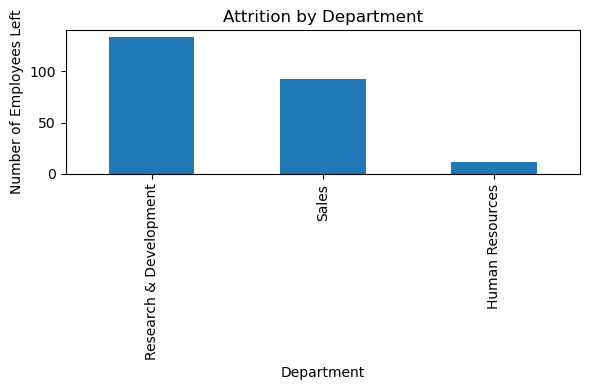

In [10]:
dept_attrition = df[df['Attrition'] == 'Yes']['Department'].value_counts()

plt.figure(figsize=(6,4))
dept_attrition.plot(kind='bar')
plt.title("Attrition by Department")
plt.ylabel("Number of Employees Left")
plt.tight_layout()
plt.savefig(os.path.join(IMAGE_DIR, "attrition_by_department.png"))
plt.show()

### Attrition by Age Group

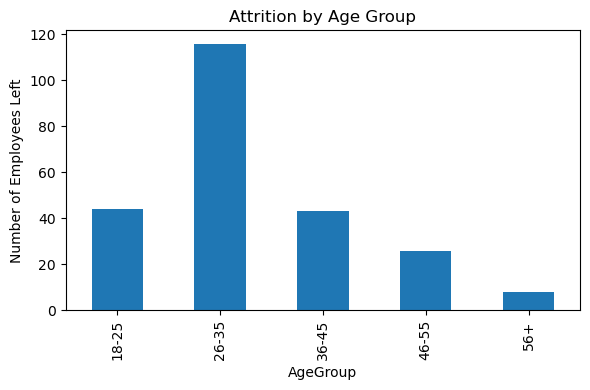

In [11]:
age_attrition = df[df['Attrition'] == 'Yes']['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(6,4))
age_attrition.plot(kind='bar')
plt.title("Attrition by Age Group")
plt.ylabel("Number of Employees Left")
plt.tight_layout()
plt.savefig(os.path.join(IMAGE_DIR, "attrition_by_agegroup.png"))
plt.show()

### Attrition by Compensation Level

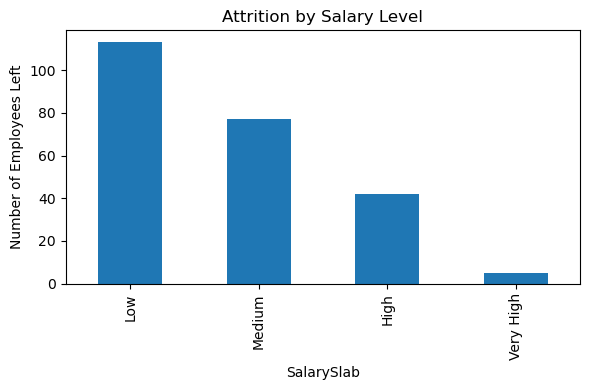

In [12]:
salary_attrition = df[df['Attrition'] == 'Yes']['SalarySlab'].value_counts().sort_index()

plt.figure(figsize=(6,4))
salary_attrition.plot(kind='bar')
plt.title("Attrition by Salary Level")
plt.ylabel("Number of Employees Left")
plt.tight_layout()
plt.savefig(os.path.join(IMAGE_DIR, "attrition_by_salary.png"))
plt.show()

### Attrition by Overtime

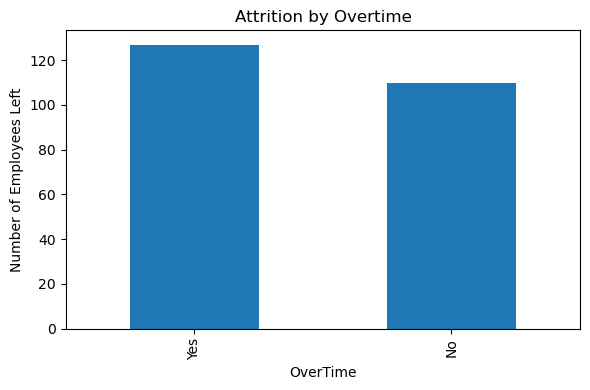

In [13]:
overtime_attrition = df[df['Attrition'] == 'Yes']['OverTime'].value_counts()

plt.figure(figsize=(6,4))
overtime_attrition.plot(kind='bar')
plt.title("Attrition by Overtime")
plt.ylabel("Number of Employees Left")
plt.tight_layout()
plt.savefig(os.path.join(IMAGE_DIR, "attrition_by_overtime.png"))
plt.show()

### Attrition by Job Role

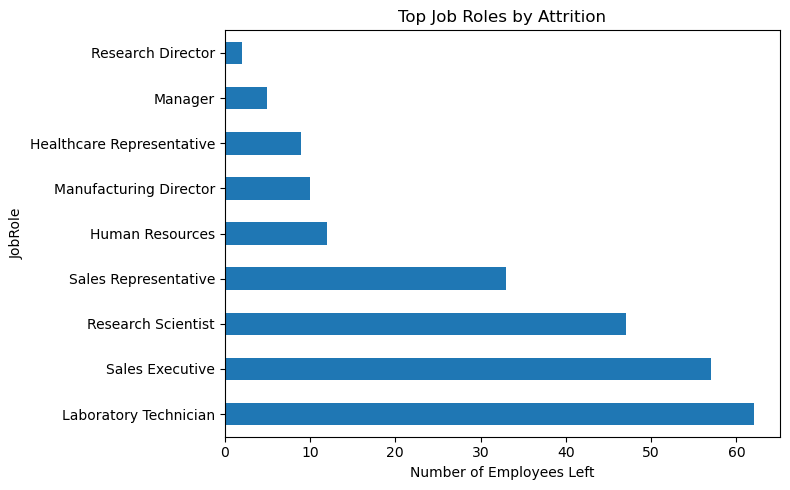

In [14]:
jobrole_attrition = df[df['Attrition'] == 'Yes']['JobRole'].value_counts().head(10)

plt.figure(figsize=(8,5))
jobrole_attrition.plot(kind='barh')
plt.title("Top Job Roles by Attrition")
plt.xlabel("Number of Employees Left")
plt.tight_layout()
plt.savefig(os.path.join(IMAGE_DIR, "attrition_by_jobrole.png"))
plt.show()

## 7. Key Insights

- Overtime employees show significantly higher attrition, indicating workload and burnout as major drivers.
- Employees in the **26–35 age group** have the highest turnover, suggesting early-career mobility and job switching.
- Attrition is highest in the **Low salary slab**, highlighting compensation as a critical retention factor.
- **Laboratory Technicians** and R&D roles show elevated attrition, requiring targeted role-specific interventions.


## 8. Business Recommendations

1. Reduce excessive overtime through workload balancing and staffing adjustments.
2. Review compensation for low-income groups to improve retention.
3. Introduce structured career growth programs for early-career employees (26–35).
4. Design role-specific retention strategies for high-attrition roles such as Laboratory Technicians.
5. Monitor high-risk segments regularly using HR dashboards and KPIs.


## 9. Conclusion

This project demonstrates a complete HR analytics workflow — from data cleaning and feature engineering
to KPI creation, exploratory analysis, and business recommendations.  
The findings highlight overtime, compensation, age group, and job roles as the strongest drivers of attrition,
supporting data-driven retention and workforce planning decisions.


In [15]:
# Export cleaned data for Excel reporting (do not overwrite master cleaned file)
EXPORT_PATH = r"C:\Users\hp\Desktop\Project_3_HR_Attrition_Analysis\Data\hr_attrition_for_excel.csv"
df.to_csv(EXPORT_PATH, index=False)

print("Exported for Excel:", EXPORT_PATH)

Exported for Excel: C:\Users\hp\Desktop\Project_3_HR_Attrition_Analysis\Data\hr_attrition_for_excel.csv
